# NetID:  gg676, xl598, vt152, smk371

# Our Approach:

We follow two approaches- Use our own custom created features, and use the features already provided to us. We use models- Resnet50 and BERT for extracting features from images and texts respectively. Since there is no model training involved in either of these feature extraction methods, we stick to using pre-trained models of the above.


# Code for Image, Text embeddings and CCA are provided on separate notebooks

# Dataset:

We use Recipe1M dataset which contains two components- image and text. The image data is split into train, validation and test whereas there exists only a single dataset of text containing two JSON files. The first JSON file contains the following fields- ‘ingredients’, ‘url’, ‘partition’, ‘title’, ‘id’, ‘instructions’. The second JSON contains an ‘id’ field that contains image id(s) and a url. This ‘id’ maps to the ‘id’ field in the first JSON associated with the text. An ‘id’ in the second JSON can have multiple images associated with it as a single text contains ingredients and instructions along with title and thus could require multiple images to cover the procedure and thus will have multiple image ids. 

Given the split of the image data, we use the image ids to split our text data into train, validation and test set. The training set contains 619408 data points and the test set contains 134286 data points.

# Model Configuration

The image data after split is used as input to a pre-trained Resnet50 and the features are extracted from the second last layer of the Resnet50 resulting in Nx2048 dimensional data where N is the number of data points in the dataset split.

Similarly, to generate the embeddings for the text data, we use the BERT model. First we tokenize using BERT word-piece tokenizer in an uncased manner and take the mean of the embeddings from the last 4 hidden layers to finally get a Nx768 dimensional text features.


# Evaluation Criteria
For the evaluation strategy we will use the following retrieval metrics: Median rank which helps to determine independent rankings without the influence of dominant features. Each contribution is included regardless of prominence or importance. The other method we will evaluate by is the recall rate of the top K, which helps to accurately measure what portion of actual positives were identified correctly within the top 1,5,10; higher numbers mean more accurate retrieval between image-text and text-image queries

# TSNE Result of CCA Image Embedding and Title+Ingredients+Instructions on 1024 latent dimensions (Code provided separately)

# The objective of t-SNE is to keep the points that are close to each other wrt distance and belonging to the same class close to each other irrespective of where the other points lie in the same space.

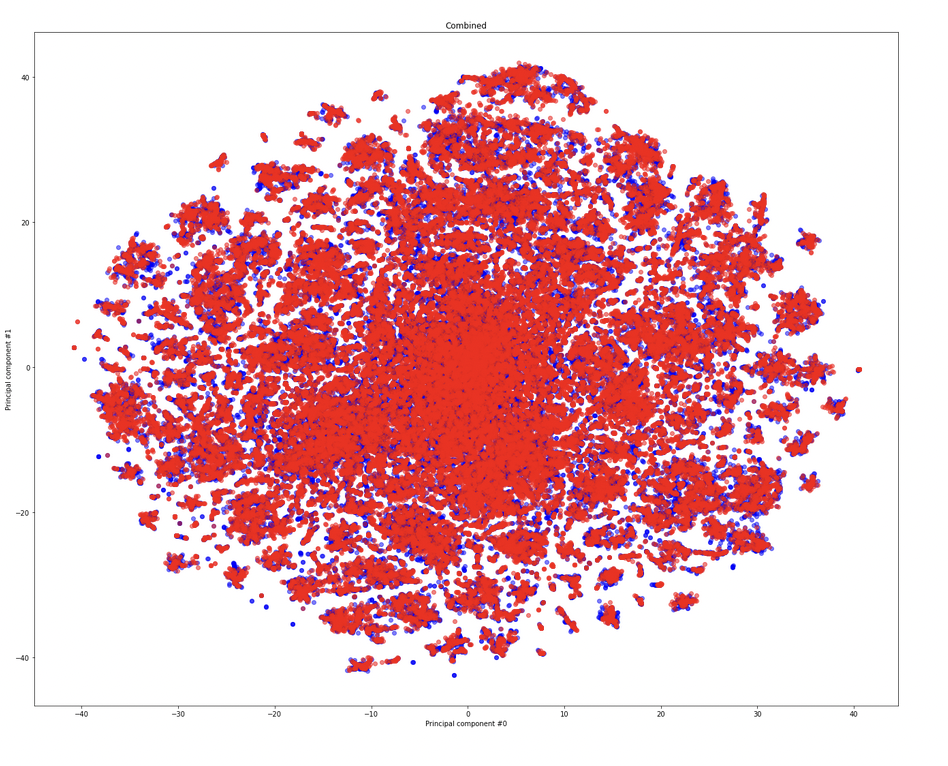

# TSNE Result of CCA Image Embedding and Title on 50 latent dimensions
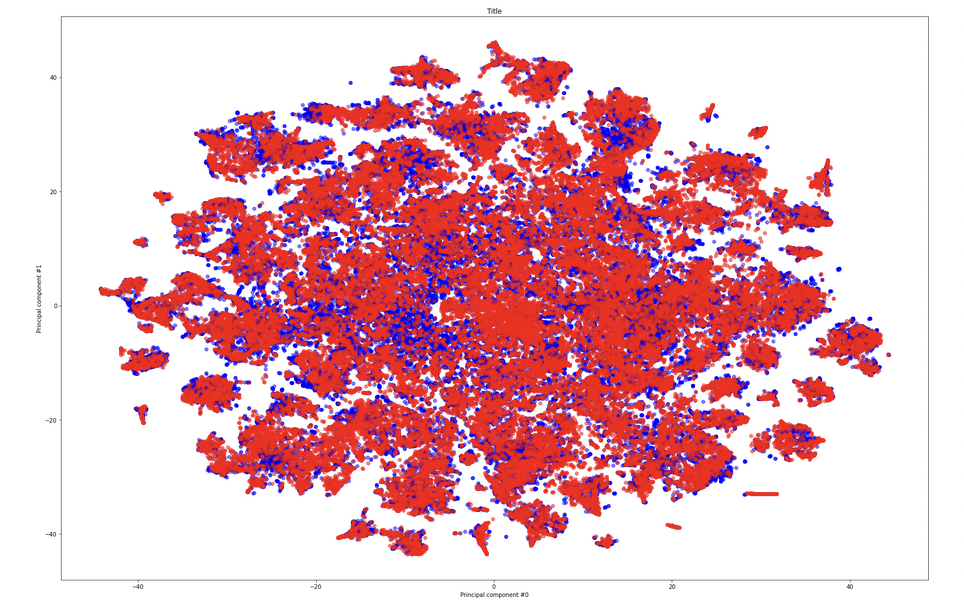

# TSNE Result of CCA Image Embedding and Ingredients on 50 latent dimensions

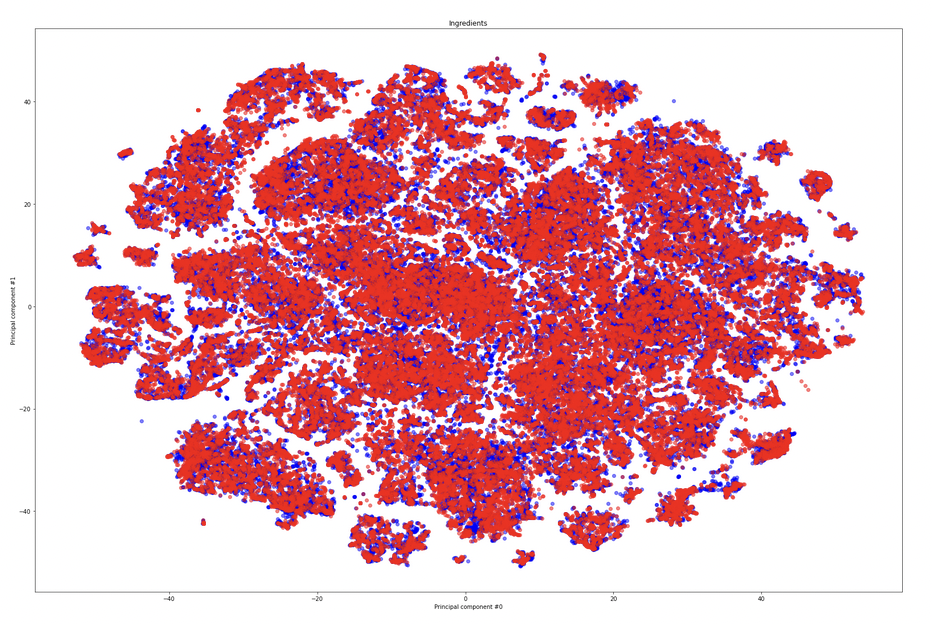

# Evaluation of TSNE

We can see that the projected points after CCA tend to be closer to each other from the above TSNE plots by looking at how the blue points and the red points are overlapping

# Results

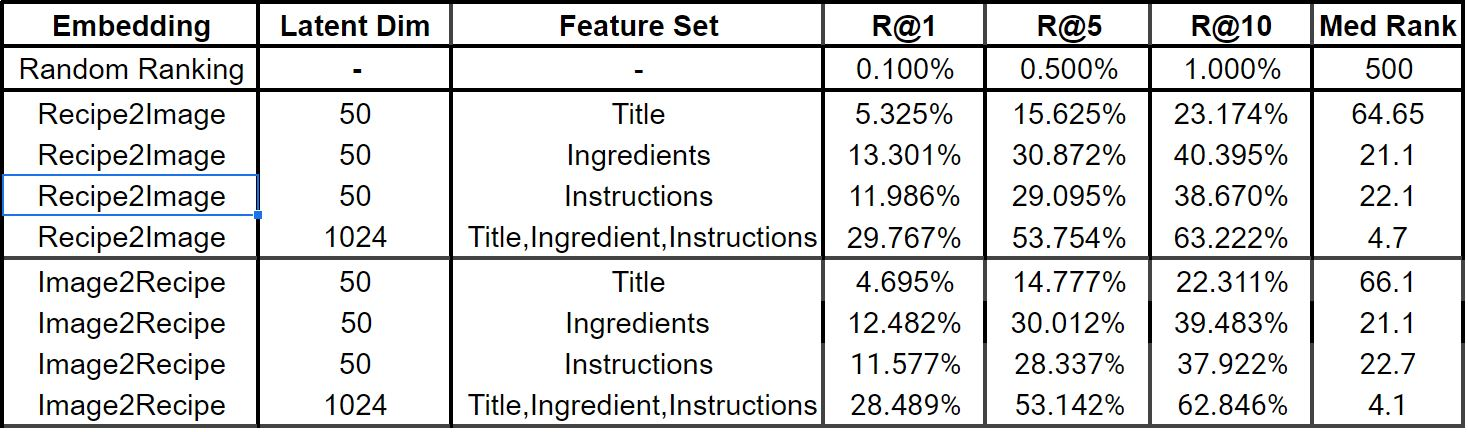

# Evaluation of Results
The higher the percentage the better our model is at identifying true positives and true negatives. The R@1 indicates the where the recipe retrieved was the correct one R@5 indicates the recipe was in the top five retrieved results and R @ 10 indicates that the correct recipe was retrieved in the top ten results. 

R@1 is the percentage of how many times our queries were correct and precise. For title features we have a 6$\%$ recall rate up from .01$\%$ of the baseline for random retrieval. We see higher R@1 recall rates for all the features with Recipe2Image . The highest is with all features combined resulting in 29.77$\%$  retrieval rate which is a third of our text queries retrieve the correct image. 

When looking at R@10 we can see that for all combined features we have a 63.22$\%$ recall rate which is a good metric to improve upon but is significantly more meaningful than randomly selecting images. Our CCA model significantly outperforms the random selection with all features sets including the combined feature set. For Image2Recipe the recall rates of Image2Recipe are similar to Recipe2Image. This indicates that our CCA model is still able to perform much better on recipe retrieval when given and image over randomly selecting and image; However, Recipe2Image retrieval performs minutely better with a 63.22$\%$ to 62.85$\%$ R@10 respectively. It is important to note the combination of all the aforementioned features does improve the model's performance significantly. With no individual feature set performing over 40$\%$.

Looking at the individual feature sets extracted for our CCA model we can look at the results of the average median (). The lower the average median the better our model is at classifying a majority of recipes/images. Random retrieval sees a higher median of around 5000 which would indicate the middle of N when N = 10,000. For the title feature set the median rank is ~250. This is significantly higher than the ingredients feature set and even more so that the instructions and combined feature sets. The median rank of the combined data-set provides the lowest rank of all the other feature sets and thus explains the high recall rates. With these two metrics we can effectively say that our CCA model outperforms the random baseline and the combined feature set outperforms any individual feature set with our CCA Model. We also analyze the effect of each component
in our our model in several optimization stages. We report using N = 10,000. 
The latent dimension is observed in the final combined feature sets. The higher dimensional features don't provide any new information, and contribute to the model performing marginally lower. Both Recipe2Image and Image2Recipe recall rate perform similarly and differ in ten-thousandths of a percent. It becomes harder to decrease the MedRank in small numbers.Additional dimensions result in The MedRank not changing.